In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgl
import utils
import remezord

# 3.1 Introduction
Digital filtering is one of the major applications of signal processing.
We will discuss here the problem of approximation and synthesis of digital filters. As
was already the case in Theory of Circuits, we will begin by examining the possibilities
of simple cells of the second order. We will then continue with the synthesis of higher
order filters.
# 3.2 Python functions used
The functions ellipord and ellip of scipy.signal will be used to create the
approximation and synthesis of the digital recursif filters of Cauer of higher order,
(non linear phase IIR filters), while the functions rezmord from the file rezemord.py
and the function rezem from scipy.signal will be used to create the approximation
and synthesis of the non recursif digital filters of higher order (linear phase FRI
filters).
# 3.3 Digital filtering
## 3.3.1 Approximation of second order filters
### Q1)
We consider a useful signal composed of a sinusoid at 120 Hz $\pm$ 1 Hz, and whose
amplitude is of the order of 20 V. This signal is superimposed on two interfering
signals: the mains voltage at 50 Hz $\pm$ 0,1 Hz of 220 V amplitude, and white
noise. Everything is sampled at 400 Hz.
We want to create a simple digital filter, consisting of 2 cells of the second
degree (a band-stop and a band-pass), which makes it possible to isolate as
much as possible the useful signal from the signals to which it is mixed. It is also
requested that the amplitude of the useful signal is not modified by more than
1%.On demande de créer un script labo441.py qui permette de:

1. Calculate de transfer functions of these two cells (determin their respective $\rho_d$
and $\theta_d$ ).
2. For each cell, check the frequency response as well as the positions of the
zeros and poles.
3. Check the frequency response of the entire filter as well as the positions of the
zeros and poles.

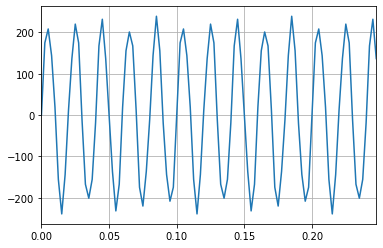

In [2]:
f = 120
fp = 50
fe = 400
N = 100

n, s120 = utils.get_sinusoid(20, f, fe, N)
_, s50 = utils.get_sinusoid(220, fp, fe, N)
sin = s120 + s50


plt.plot(n, sin)
plt.grid()
plt.margins(x=0)

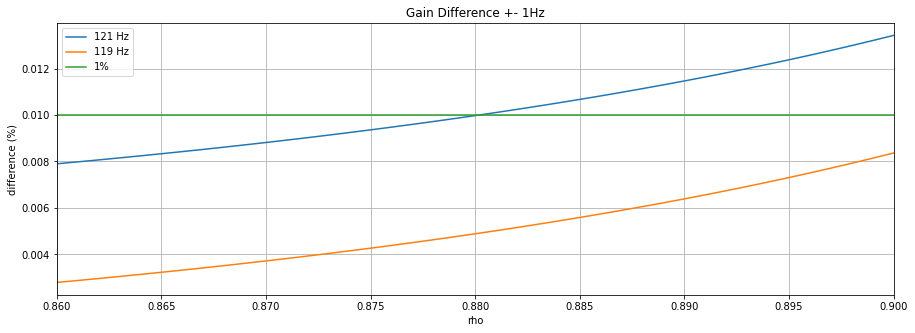

In [3]:
theta = f/fe*(2*np.pi)
res = np.ndarray((0, 6))

for rho in np.arange(0.9, 0.86, -0.001):
    b = [1 , -np.cos(theta)]
    a = [1 , -2*rho*np.cos(theta), rho**2]
    
    w, h  = sgl.freqz(b, a, worN=[(f)/fe*2*np.pi, (f-1)/fe*2*np.pi, (f+1)/fe*2*np.pi])
    h = abs(h).reshape((h.shape[0], 1))
    proc = np.array([(h[0]-h[1])/h[0], (h[0]-h[2])/h[0]])
    resl = np.transpose(np.concatenate(([[rho]], h, proc)))
    res = np.concatenate((res, resl))

plt.figure(figsize=(15, 5))
plt.title('Gain Difference +- 1Hz')
plt.plot(res[:, 0], res[:, -1], label='121 Hz')
plt.plot(res[:, 0], res[:, -2], label='119 Hz')
plt.plot(res[:, 0], np.ones(res[:, 0].shape)*0.01, label='1%')
plt.legend()
plt.margins(x=0)
plt.xlabel('rho')
plt.ylabel('difference (%)')
plt.grid()


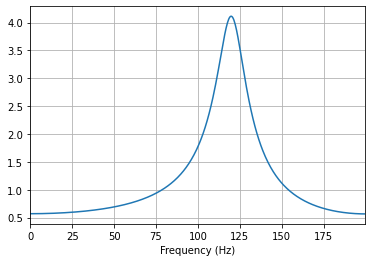

In [4]:
rho = 0.87
b = np.array([1 , -np.cos(theta)])
a = [1 , -2*rho*np.cos(theta), rho**2]

w, h = sgl.freqz(b, a)
h = abs(h)

plt.plot(w/(2*np.pi)*fe, abs(h))
plt.margins(x=0)
plt.xlabel('Frequency (Hz)')
plt.grid()

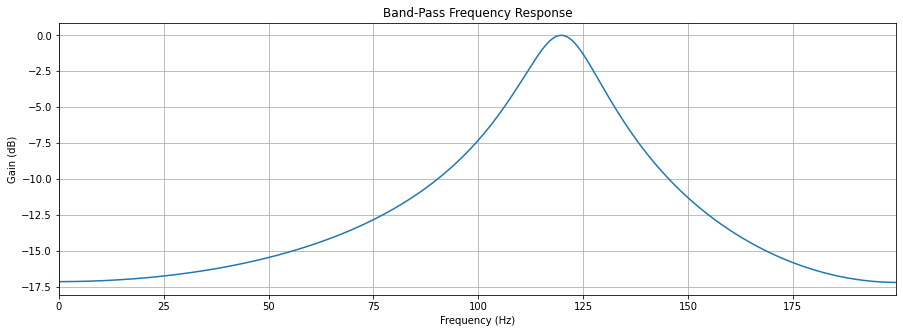

In [5]:
_, A120 = sgl.freqz(b, a, worN=[(f)/fe*2*np.pi])
A120 = abs(A120)
k_found = 1/A120


b = np.array([1 , -np.cos(theta)])*k_found
a = [1 , -2*rho*np.cos(theta), rho**2]

w, h = sgl.freqz(b, a)
frbp = h

plt.figure(figsize=(15, 5))
plt.plot(w/(2*np.pi)*fe, utils.to_db(frbp))
plt.margins(x=0)
plt.title('Band-Pass Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid()

In [6]:
k_found

array([0.24316201])

band-pass: $H(Z) = 0.2432\frac{1-\cos{(1.88)}Z^{-1}}{1 - 1.74\cos{(1.88)}Z^{-1} + 0.87^2Z^{-2}}$

In [7]:
sinbp = sgl.lfilter(b, a, sin)

In [8]:
theta = fp/fe*(2*np.pi)
theta

0.7853981633974483

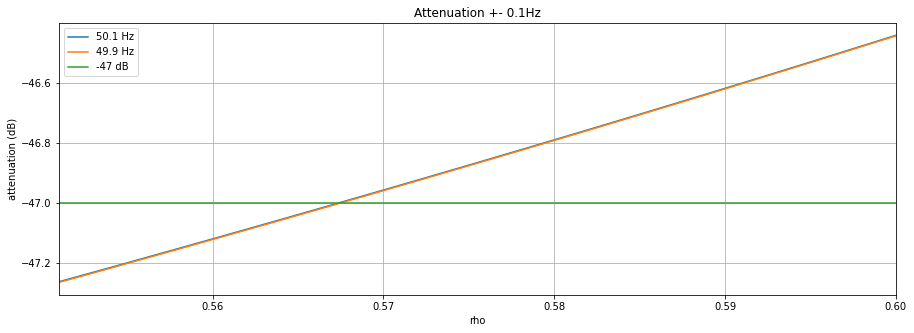

In [9]:
res = np.ndarray((0, 4))

for rho in np.arange(0.60, 0.55, -0.001):
    b = [1, -2*np.cos(theta), 1]
    a = [1, -2*rho*np.cos(theta), rho**2]
    
    w, h  = sgl.freqz(b, a, worN=[(fp)/fe*2*np.pi, (fp-0.1)/fe*2*np.pi, (fp+0.1)/fe*2*np.pi])
    #print(np.round(rho, 2), utils.to_db(h))
    h = utils.to_db(h).reshape((h.shape[0], 1))
    resl = np.transpose(np.concatenate(([[rho]], h)))
    res = np.concatenate((res, resl))
    
plt.figure(figsize=(15, 5))
plt.plot(res[:, 0], res[:, -1], label='50.1 Hz')
plt.plot(res[:, 0], res[:, -2], label='49.9 Hz')
plt.plot(res[:, 0], np.ones(res[:, 0].shape)*-47, label='-47 dB')
plt.title('Attenuation +- 0.1Hz')
plt.xlabel('rho')
plt.ylabel('attenuation (dB)')
plt.margins(x=0)
plt.legend()
plt.grid()

In [10]:
rho = 0.56
b = [1, -2*np.cos(theta), 1]
a = [1, -2*rho*np.cos(theta), rho**2]

_, A120 = sgl.freqz(b, a, worN=[(f)/fe*2*np.pi])
A120 = abs(A120)
k_found = 1/A120
k_found

array([0.67128367])

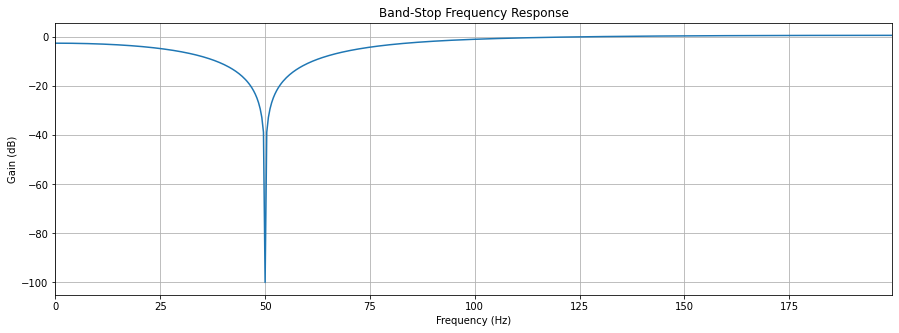

In [11]:
b = np.array([1, -2*np.cos(theta), 1])*k_found
a = [1, -2*rho*np.cos(theta), rho**2]

w, h = sgl.freqz(b, a)
frbs = h

plt.figure(figsize=(15, 5))
plt.plot(w/(2*np.pi)*fe, utils.to_db(frbs))
plt.margins(x=0)
plt.title('Band-Stop Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid()

formule

In [12]:
sinbs = sgl.lfilter(b, a, sinbp)

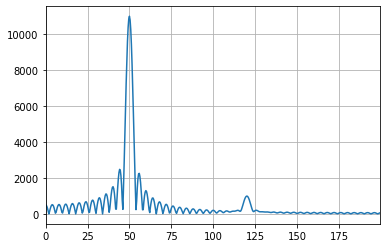

In [13]:
w, h = sgl.freqz(sin)
plt.plot(w/(2*np.pi)*fe, abs(h))
plt.margins(x=0)
plt.grid()

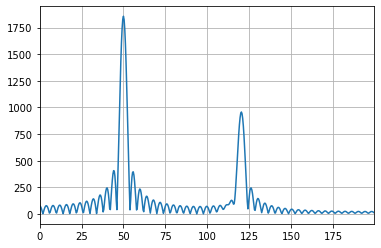

In [14]:
w, h = sgl.freqz(sinbp)
plt.plot(w/(2*np.pi)*fe, abs(h))
plt.margins(x=0)
plt.grid()

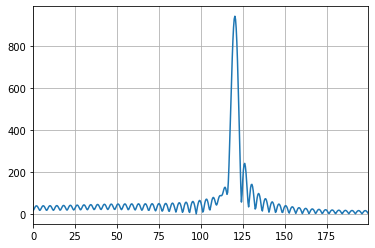

In [15]:
w, h = sgl.freqz(sinbs)
plt.plot(w/(2*np.pi)*fe, abs(h))
plt.margins(x=0)
plt.grid()

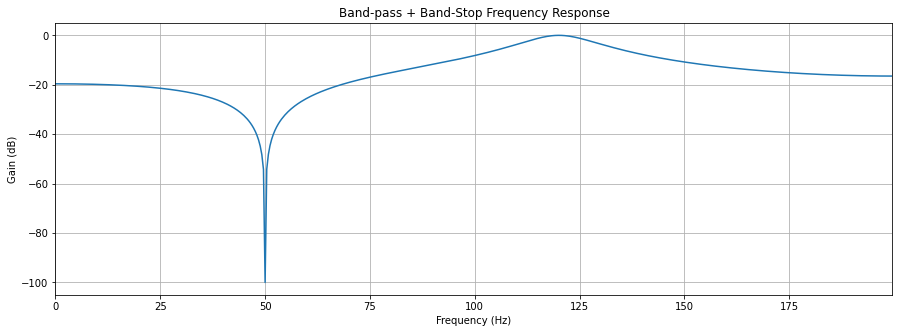

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(w/(2*np.pi)*fe, utils.to_db(frbp*frbs))
plt.margins(x=0)
plt.title('Band-pass + Band-Stop Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid()

## 3.3.2 Approximation of higher order filters
### Q2)
We want to create the approximation of a low-pass digital filter (with normalized
frequency : fe=1)with the following specifications :
bandwidth : 0 to 0.2 Hz with a tolerance of 0.1 dB (in total)
Attenuated band : 0.25 to 0.5 Hz with the attenuation of, at least, 60 dB.
You are asked to:

1. Write a script labo442.py that give :
    1. A recursif filter (of Cauer)
    2. A linear phase non recursif filter  
With the following specifications :
2. For each filter :
    1. Visualize the frequency response and the impulse response.
    2. Visualize the positions of the zeros and poles.
3. verifier that the specifications are met.
4. Compare the order of the filters and estimat